## Problem Statement: AI in Workplace Productivity

To analyze how AI tool adoption, workload balance, collaboration, and employee well-being influence workplace productivity and burnout risk, and to build machine learning models that predict productivity levels and burnout categories using employee-level data.

In [20]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("ai_productivity_features.csv")

In [12]:
df.head()

,Employee_ID,job_role,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,deadline_pressure_level,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score
0,3c6ca882-3fa3-446b-8208-c92f3f306f06,Writer,19,11.8,28.5,19.2,1.4,High,1.9,2.3,0.20,2,7.1,4.8,10.00
1,02f168cc-7747-4dbd-a868-ea2cfb41e22a,Designer,4,10.8,24.1,23.3,2.6,Low,8.0,9.8,1.82,3,3.4,5.5,6.78
2,d39ce8c9-6e2a-4f86-b888-e2b5f4a18cf7,Developer,6,25.9,69.4,10.0,1.4,Medium,6.8,8.9,5.52,5,4.6,3.8,9.66
3,14511660-d78a-453f-9449-f17cd239ec27,Manager,20,7.9,17.2,25.1,0.2,High,3.5,8.6,1.14,5,5.6,3.9,10.00
4,0597f0bb-ed5a-4e35-94ac-3f0f6a5c2bc2,Developer,15,8.6,20.6,20.1,1.4,Low,5.9,5.3,2.75,10,1.0,7.4,5.38


In [13]:
df.shape

(4500, 15)

In [14]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee_ID                   4500 non-null   str    
 1   job_role                      4500 non-null   str    
 2   experience_years              4500 non-null   int64  
 3   ai_tool_usage_hours_per_week  4500 non-null   float64
 4   tasks_automated_percent       4500 non-null   float64
 5   manual_work_hours_per_week    4500 non-null   float64
 6   learning_time_hours_per_week  4500 non-null   float64
 7   deadline_pressure_level       4500 non-null   str    
 8   meeting_hours_per_week        4500 non-null   float64
 9   collaboration_hours_per_week  4500 non-null   float64
 10  error_rate_percent            4500 non-null   float64
 11  task_complexity_score         4500 non-null   int64  
 12  focus_hours_per_day           4500 non-null   float64
 13  work_life_bala

In [15]:
df.describe()

,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,10.427556,10.349667,25.908467,22.372867,2.001756,6.571089,8.249311,2.097044,5.507556,4.694489,4.724689,8.354816
std,5.745073,5.808240,15.157930,6.465516,1.408176,4.683117,3.040733,1.519145,2.861737,1.337197,1.993201,1.813773
min,1.000000,0.000000,0.000000,10.000000,0.000000,1.000000,2.000000,0.100000,1.000000,1.000000,1.000000,3.220000
25%,6.000000,6.000000,14.500000,17.900000,1.000000,3.400000,6.200000,0.710000,3.000000,3.900000,3.300000,6.850000
50%,10.000000,9.700000,24.500000,22.500000,1.700000,5.700000,8.000000,2.000000,6.000000,4.800000,4.700000,9.035000
75%,15.000000,14.300000,36.000000,26.800000,2.700000,8.200000,10.000000,3.290000,8.000000,5.600000,6.200000,10.000000
max,20.000000,30.400000,79.900000,43.300000,11.500000,30.200000,20.000000,6.670000,10.000000,8.000000,10.000000,10.000000


In [16]:
df.isnull().sum()

Employee_ID                     0
job_role                        0
experience_years                0
ai_tool_usage_hours_per_week    0
tasks_automated_percent         0
manual_work_hours_per_week      0
learning_time_hours_per_week    0
deadline_pressure_level         0
meeting_hours_per_week          0
collaboration_hours_per_week    0
error_rate_percent              0
task_complexity_score           0
focus_hours_per_day             0
work_life_balance_score         0
burnout_risk_score              0
dtype: int64

# EDA

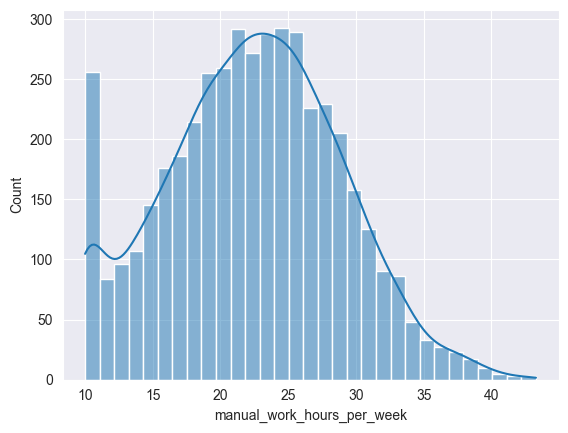

In [19]:
sns.histplot(df["manual_work_hours_per_week"], kde=True);

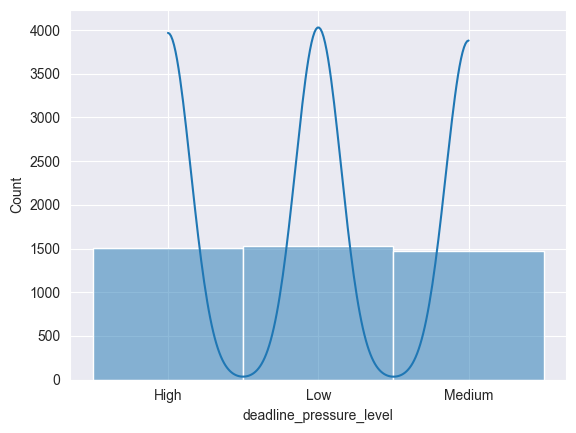

In [21]:
sns.histplot(df["deadline_pressure_level"], kde=True);

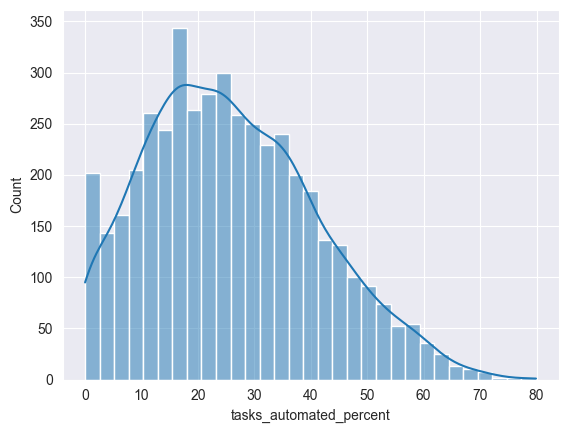

In [22]:
sns.histplot(df["tasks_automated_percent"], kde=True);